In [1]:
# Dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load data into dataframe
file_path = Path('../Resources/refactored_data/combineddata.csv')
df = pd.read_csv(file_path)

# Pull desired columns
df_stlhead_week_month = df[['weeknumber','monthvalue','maxtempf','mintempf','precipitationinch','watertempf','stlheadcount']]

# Drop NaN values
df = df_stlhead_week_month.dropna(axis=0)

df = df.astype({'stlheadcount': 'int64'})

# Make a df grouped by average count on monthvalue
week_df = df.groupby(['weeknumber']).mean().reset_index()
week_df = week_df.drop(columns = ['monthvalue'])
week_df

,weeknumber,maxtempf,mintempf,precipitationinch,watertempf,stlheadcount
0,1,41.833333,32.185185,0.366481,40.860000,17.185185
1,2,42.043956,32.934066,0.410659,40.365055,17.395604
2,3,41.988764,33.550562,0.320674,39.600449,16.258427
3,4,44.470588,35.082353,0.316706,38.816706,14.552941
4,5,47.132530,37.060241,0.461205,39.098072,16.879518
5,6,46.101266,34.860759,0.289114,39.026835,14.443038
6,7,48.488889,35.755556,0.259444,39.184000,18.411111
7,8,49.344086,35.967742,0.333226,39.563871,19.860215
8,9,48.868132,35.516484,0.250440,40.062418,22.505495
9,10,51.898990,36.101010,0.370808,40.765455,32.484848


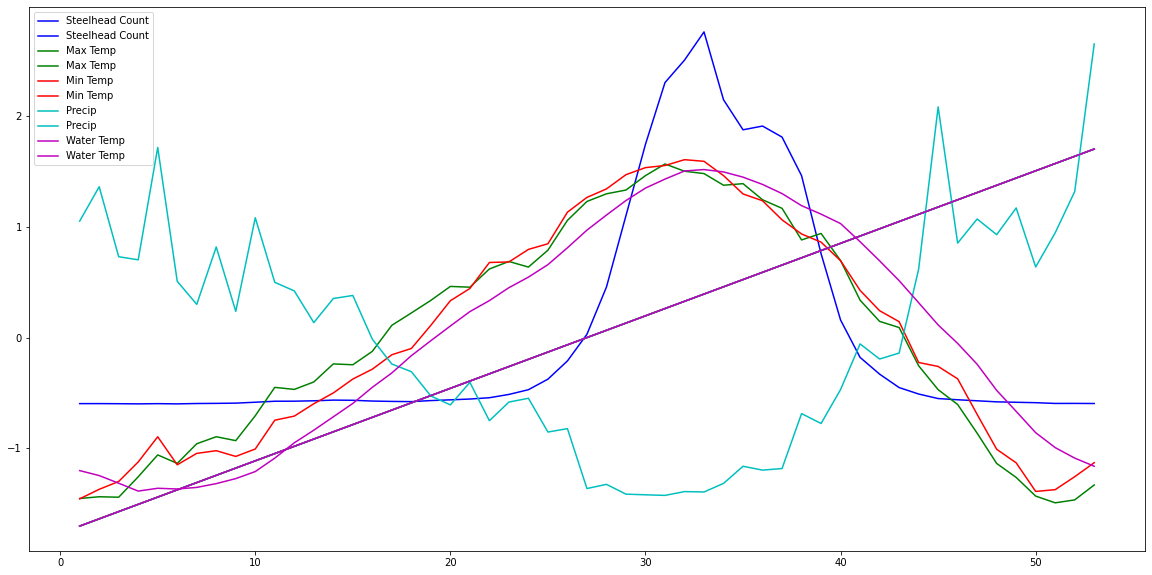

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# scaled = StandardScaler().fit_transform(week_df)
# x = np.reshape((week_df['weeknumber']), (1, 2))
x = week_df['weeknumber']

max_temp = week_df[['weeknumber', "maxtempf"]]
x1 = StandardScaler().fit_transform(max_temp)

min_temp = week_df[['weeknumber', "mintempf"]]
x2 = StandardScaler().fit_transform(min_temp)

precip = week_df[['weeknumber', "precipitationinch"]]
x3 = StandardScaler().fit_transform(precip)

water_temp = week_df[['weeknumber', "watertempf"]]
x4 = StandardScaler().fit_transform(water_temp)

stlhead = week_df[['weeknumber', "stlheadcount"]]
y = StandardScaler().fit_transform(stlhead)

plt.figure(figsize=(20,10))
plt.plot(x, y, label = "Steelhead Count", color='b')
plt.plot(x, x1, label = "Max Temp", color='g')
plt.plot(x, x2, label = "Min Temp", color='r')
plt.plot(x, x3, label = "Precip", color='c')
plt.plot(x, x4, label = "Water Temp", color='m')
plt.legend()
plt.show()

In [4]:
# Based Poly Regression

target = ['stlheadcount']

# Creating features
X = week_df.drop('stlheadcount', axis=1)

# Creating target
y = week_df['stlheadcount']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)

predict = model.predict(X_test)
print(predict)
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, predict))
print("Coefficient of determination: %.2f" % r2_score(y_test, predict))

print("Train: ", model.score(X_train, y_train))
print("Test: ", model.score(X_test, y_test))

[ -28.22485322  762.08250646   17.8384521   119.68612864 -848.53334026
  210.0676553   179.5100965    37.12274307 -727.21333682 3460.58979319
 -250.63737291  999.69929843 1369.72506677   52.59527627]
Coefficients: 
 [ 3.36988803e+02  1.01221893e+03 -3.30434796e+03 -1.41332396e+04
 -1.10191173e+02 -9.36443636e+00 -5.08210537e+00  1.46242544e+01
 -6.60075693e+01 -2.17476017e+00 -1.09571956e+01  6.75395786e+01
 -2.47632751e+03 -4.02000032e+01 -6.73308558e+01  4.94522644e+03
  6.78235253e+01  7.15405677e+02 -1.06352559e+03 -6.02760101e-01]
Mean squared error: 252837.91
Coefficient of determination: 0.77
Train:  0.9698020112387651
Test:  0.7669642133911235


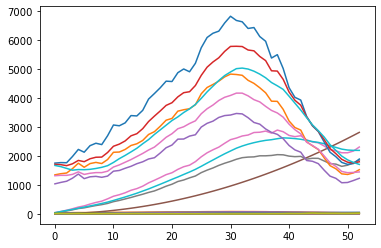

In [5]:
plt.plot(poly_features)
plt.show()

In [6]:
## Testing different train test split percentages

In [21]:
# Based Poly Regression with test at 33%

target = ['stlheadcount']

# Creating features
X = week_df.drop('stlheadcount', axis=1)

# Creating target
y = week_df['stlheadcount']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, random_state=42, test_size=0.33)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)

predict = model.predict(X_test)
print(predict)
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, predict))
print("Coefficient of determination: %.2f" % r2_score(y_test, predict))

print("Train: ", model.score(X_train, y_train))
print("Test: ", model.score(X_test, y_test))

[   20.42474174   667.48888493    54.40581216   277.05471583
  -736.00605916   132.87463166   123.57777954    77.0745114
 -1224.70477246  3453.70314714  -220.34063333  1333.96430252
  1578.75311488   -69.35539547  3180.68667997 -1671.23014959
  2038.91506907   795.02954539]
Coefficients: 
 [ 5.74920235e+02  5.03004186e+02 -2.40862158e+03 -9.24949687e+03
 -5.28781017e+02 -1.41834161e+01  3.96178503e+00  1.75230637e+01
 -4.89305857e+01 -1.31812125e+01 -1.06497403e+01  9.50731881e+01
 -2.15710040e+03 -6.01990646e+01 -9.58046546e+01  3.70510120e+03
  6.97613336e+01  3.26550796e+02 -5.17173182e+02  1.45974155e+01]
Mean squared error: 481818.79
Coefficient of determination: 0.66
Train:  0.9751873587632003
Test:  0.6618827303298841


In [8]:
# Based Poly Regression with test at 67%

target = ['stlheadcount']

# Creating features
X = week_df.drop('stlheadcount', axis=1)

# Creating target
y = week_df['stlheadcount']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, random_state=42, test_size=0.67)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)

predict = model.predict(X_test)
print(predict)
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, predict))
print("Coefficient of determination: %.2f" % r2_score(y_test, predict))

print("Train: ", model.score(X_train, y_train))
print("Test: ", model.score(X_test, y_test))

[   66.12629896   840.18226954    13.5503896    746.43994976
  -339.15266776   205.69895448  -504.80862027  2510.3211706
 -1721.305367    2958.15046788  -263.27250228  2069.61948701
  1264.78623479   341.61459024  2775.63682835 -4807.17515249
  1926.08691885  1162.48099573 -7159.43838675  3396.51557367
  4333.28683044   496.06334573   -49.59505912  -155.69328915
  2303.08533672  3107.6654418    -74.94965084   254.94832616
  -811.46541718 -2493.17972742  1547.43617042  2872.43715394
  1204.06446129  2251.48063814 -4122.18758592 -1715.57036763]
Coefficients: 
 [ 1638.45595515  -367.70092362  -363.1681681     43.29404773
 -1660.48486389   -14.75292572    63.00524697   -45.23688377
   230.11738274   -47.83628642   -39.27685688   232.12111436
   697.73531115  -130.05326534  -164.58167178   183.55243221
    22.24606075    49.64636018 -1380.22284857    95.3681981 ]
Mean squared error: 3967436.09
Coefficient of determination: -1.24
Train:  1.0
Test:  -1.2399562557811512


In [9]:
# Based Poly Regression with test at 50%

target = ['stlheadcount']

# Creating features
X = week_df.drop('stlheadcount', axis=1)

# Creating target
y = week_df['stlheadcount']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, random_state=10, test_size=0.50)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)

predict = model.predict(X_test)
print(predict)
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, predict))
print("Coefficient of determination: %.2f" % r2_score(y_test, predict))

print("Train: ", model.score(X_train, y_train))
print("Test: ", model.score(X_test, y_test))

[ 7.67905228e+01 -2.12832307e+02  2.68778476e+02  2.87139760e+02
  3.64842036e+03  3.20432468e+03  1.20824306e+03  1.08553789e+03
 -8.18531191e+02  1.76554680e+03  1.36423078e+02  3.29197882e+03
  9.49804686e+02 -2.21510358e+02  2.09544943e+02 -6.31138571e+02
  2.05814905e+02 -8.24322780e+02 -5.77856490e+01  2.01982378e+03
  1.87041073e+03  3.77371533e+02  3.62565180e+03  1.84724138e+03
 -1.08450307e-01  4.12629279e+02  2.89317099e+02]
Coefficients: 
 [ 2.22930613e+02  4.83120769e+03 -6.56439290e+03  6.90861355e+04
 -4.36536890e+02  1.05536961e+00 -1.36463380e+00 -3.17898037e+01
 -3.13706235e+02  2.27217697e+01 -6.27420154e+01  1.29824407e+02
 -6.53797028e+03 -2.63514741e+01 -1.68634511e+02  9.24792289e+03
  2.28129428e+02 -4.58189372e+04 -9.29930055e+02 -7.69566952e+01]
Mean squared error: 769631.96
Coefficient of determination: 0.37
Train:  0.9858726046848134
Test:  0.3675744566355734


In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Standard Scaler

target = ['stlheadcount']

# Creating features
X = week_df.drop('stlheadcount', axis=1)

ss_X = StandardScaler().fit_transform(X)

# Creating target
y = week_df['stlheadcount']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(ss_X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, random_state=42)

# ss_X_train = StandardScaler().fit_transform(X)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)

predict = model.predict(X_test)
print(predict)
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, predict))
print("Coefficient of determination: %.2f" % r2_score(y_test, predict))

print("Train: ", model.score(X_train, y_train))
print("Test: ", model.score(X_test, y_test))

[ -28.22485322  762.08250646   17.83845211  119.68612865 -848.53334025
  210.0676553   179.5100965    37.12274308 -727.21333682 3460.58979318
 -250.63737291  999.69929843 1369.72506677   52.59527627]
Coefficients: 
 [  660.4036461  -2074.89947215  -518.46102283  -487.56861205
  1205.26654381 -2191.2781075  -1048.7223313   1948.98655786
  -144.01921659  -367.93271456 -1993.96374547  7937.69579568
 -4764.70239955 -5997.69137028 -5110.56009923  6145.14508665
  6535.16635569    14.55425342 -1677.70587643   -73.72974082]
Mean squared error: 252837.91
Coefficient of determination: 0.77
Train:  0.9698020112387653
Test:  0.7669642133907473


In [12]:
# Min Max Scaler

target = ['stlheadcount']

# Creating features
X = week_df.drop('stlheadcount', axis=1)

mm_X = MinMaxScaler().fit_transform(X)

# Creating target
y = week_df['stlheadcount']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(mm_X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)

predict = model.predict(X_test)
print(predict)
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, predict))
print("Coefficient of determination: %.2f" % r2_score(y_test, predict))

print("Train: ", model.score(X_train, y_train))
print("Test: ", model.score(X_test, y_test))

[ 3268.23793913    88.97420261 -2432.84865854  3463.16843855
  3543.65809233  -744.07804323  3273.19747662  1532.85340095
 -1750.63485259   -89.45591142  -118.85032611  -620.54480332
  -950.55130001  1660.80691276]
Coefficients: 
 [ -11513.95078964   38323.65043538  -58246.67292008   -1439.26588938
   20285.03973867    3120.20384614   55540.79184536  -95287.50183691
   12127.18915996   35474.07673847  -84017.37497715  195020.10902806
  -51703.98487192  -98171.92658487 -151581.01412279   93553.22585206
  212300.60957071    -867.18533337  -44751.17403442  -63747.86518622]
Mean squared error: 1075326.52
Coefficient of determination: 0.58
Train:  0.9676781220006583
Test:  0.5800296809417469


In [13]:
# Max ABS Scaler

target = ['stlheadcount']

# Creating features
X = week_df.drop('stlheadcount', axis=1)

mabs_X = MaxAbsScaler().fit_transform(X)

# Creating target
y = week_df['stlheadcount']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(mabs_X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)

predict = model.predict(X_test)
print(predict)
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, predict))
print("Coefficient of determination: %.2f" % r2_score(y_test, predict))

print("Train: ", model.score(X_train, y_train))
print("Test: ", model.score(X_test, y_test))

[ 3268.23793913    88.97420261 -2432.84865854  3463.16843855
  3543.65809233  -744.07804323  3273.19747662  1532.85340095
 -1750.63485258   -89.45591142  -118.85032611  -620.54480332
  -950.55130001  1660.80691276]
Coefficients: 
 [ 4.67117858e+03  1.80501303e+05 -3.19906403e+05 -8.85941803e+03
  3.74343311e+04  3.24136561e+03  1.13347525e+05 -2.14457001e+05
  1.26536584e+04  7.99325555e+04 -3.36840270e+05  8.62260727e+05
 -1.05982679e+05 -4.34565089e+05 -7.39108730e+05  2.11482268e+05
  1.03638967e+06 -9.08821898e+02 -1.01280989e+05 -3.11562936e+05]
Mean squared error: 1075326.52
Coefficient of determination: 0.58
Train:  0.967678122000658
Test:  0.5800296809418122


In [14]:
# Robust Scaler

target = ['stlheadcount']

# Creating features
X = week_df.drop('stlheadcount', axis=1)

rs_X = RobustScaler(quantile_range=(25, 75)).fit_transform(X)

# Creating target
y = week_df['stlheadcount']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(rs_X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)

predict = model.predict(X_test)
print(predict)
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, predict))
print("Coefficient of determination: %.2f" % r2_score(y_test, predict))

print("Train: ", model.score(X_train, y_train))
print("Test: ", model.score(X_test, y_test))

[ 3268.23793913    88.97420261 -2432.84865854  3463.16843855
  3543.65809233  -744.07804323  3273.19747662  1532.85340095
 -1750.63485259   -89.45591142  -118.85032611  -620.54480332
  -950.55130001  1660.80691276]
Coefficients: 
 [   254.62598469   -726.89042456  -1913.58375495  -1434.42553211
   1891.69962348    780.05096154  16447.99667906 -29092.24798831
   2239.58876709  11997.53595718 -29473.45065435  70531.26423987
 -11310.79362607 -39330.47638143 -56518.09032871  21099.30874261
  87686.66065619   -118.30093389 -11180.30142868 -29166.71748106]
Mean squared error: 1075326.52
Coefficient of determination: 0.58
Train:  0.9676781220006563
Test:  0.5800296809417818


In [15]:
# Power Transformer

target = ['stlheadcount']

# Creating features
X = week_df.drop('stlheadcount', axis=1)

pt_X = PowerTransformer(method="yeo-johnson").fit_transform(X)

# Creating target
y = week_df['stlheadcount']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(pt_X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)

predict = model.predict(X_test)
print(predict)
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, predict))
print("Coefficient of determination: %.2f" % r2_score(y_test, predict))

print("Train: ", model.score(X_train, y_train))
print("Test: ", model.score(X_test, y_test))

[ 3019.50941503  1064.04521953 -3985.65636551  3196.58285136
  3242.12180319 -1194.76454775  2945.19462843  1477.24108739
 -2654.43543978     7.985921     -16.34223933  -719.23879367
 -1010.18091832  2688.2036763 ]
Coefficients: 
 [ -1980.27326621   4263.60825203  -8140.47094079    249.21028979
   6024.04835922     45.71476916   7867.37865647 -10686.39720467
   2328.5615682    4062.34363085 -14885.04106171  39069.09630654
  -4429.16164284 -19962.99818488 -24012.94363391  11545.17895489
  26051.17609962    150.53321302  -8390.46979108  -6437.70294021]
Mean squared error: 2608697.37
Coefficient of determination: -0.02
Train:  0.95763504529997
Test:  -0.018830510406323997


In [16]:
# Power Transformer

target = ['stlheadcount']

# Creating features
X = week_df.drop('stlheadcount', axis=1)

pt_X = PowerTransformer(method="box-cox").fit_transform(X)

# Creating target
y = week_df['stlheadcount']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(pt_X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)

predict = model.predict(X_test)
print(predict)
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, predict))
print("Coefficient of determination: %.2f" % r2_score(y_test, predict))

print("Train: ", model.score(X_train, y_train))
print("Test: ", model.score(X_test, y_test))

[ 3190.77354117  1284.38785695 -3389.81938467  3243.50394169
  3252.35457484 -1105.55634226  3009.52764294  1391.2773596
 -2357.90821989    43.54597605    60.97510047  -373.10659025
  -798.9911783   2359.38672069]
Coefficients: 
 [-1.74914306e+03  3.37341723e+03 -7.22451452e+03  3.25056197e+01
  5.56134591e+03 -4.77576547e+01  7.04850739e+03 -8.86755879e+03
  2.26867058e+03  2.94224346e+03 -1.08177165e+04  3.27017002e+04
 -1.71365199e+03 -1.77991208e+04 -2.03264708e+04  9.44055719e+03
  2.07107706e+04  6.12960649e+02 -8.14557541e+03 -4.24626150e+03]
Mean squared error: 2006831.95
Coefficient of determination: 0.22
Train:  0.9615480692907802
Test:  0.2162288974007015


In [17]:
# QuantileTransformer

target = ['stlheadcount']

# Creating features
X = week_df.drop('stlheadcount', axis=1)

qt_X =QuantileTransformer(output_distribution="uniform").fit_transform(X)

# Creating target
y = week_df['stlheadcount']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(qt_X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)

predict = model.predict(X_test)
print(predict)
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, predict))
print("Coefficient of determination: %.2f" % r2_score(y_test, predict))

print("Train: ", model.score(X_train, y_train))
print("Test: ", model.score(X_test, y_test))

[ 3696.79709001  3394.13697087   622.12991066  4155.80304387
  3965.9207677    599.68803576  4106.54285182  1697.0934735
   109.65368228  -252.88994953  -282.35924704  1496.83121821
   395.51059999 -2900.3730062 ]
Coefficients: 
 [-48995.96521916 -73566.89779778  17653.7458588  -17547.04440713
  48783.44282289   6991.63624591 -31603.95144512   4951.12234414
  34532.36925786  64584.4015915    -307.08648881  35729.75430475
  76564.23318185  70135.12448169 -49897.50553881 -15319.27964165
  30843.94852406   3133.45329115 -66424.48532319 -86975.51912285]
Mean squared error: 1784761.06
Coefficient of determination: 0.30
Train:  0.9612251180512505
Test:  0.30295900115734054


C:\Users\mthal\anaconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (53). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


In [18]:
# QuantileTransformer

target = ['stlheadcount']

# Creating features
X = week_df.drop('stlheadcount', axis=1)

qt_X =QuantileTransformer(output_distribution="normal").fit_transform(X)

# Creating target
y = week_df['stlheadcount']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(qt_X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)

predict = model.predict(X_test)
print(predict)
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, predict))
print("Coefficient of determination: %.2f" % r2_score(y_test, predict))

print("Train: ", model.score(X_train, y_train))
print("Test: ", model.score(X_test, y_test))

[ 8.50868575e+04 -2.91821192e+03  6.84046950e+03 -7.30449565e+04
  5.71602879e+04 -1.98915256e+02  4.54810231e+03  1.28961159e+03
  3.27406482e+01  5.08906170e+01  7.41836911e+02 -1.06420441e+05
  5.80121455e+01 -6.50777010e+02]
Coefficients: 
 [ -1931.6918598    1569.04543278   -291.06412835    633.76016512
   2867.38101752    989.68326301  -5119.41020231  -2416.62141033
   -396.14009834   8241.62423266   2038.1712911  -18609.72607769
  -5819.30768275   9877.49070579   5636.93023615    677.20551023
   7658.97329092  -1170.63572789   1997.39922451  -8368.63896217]
Mean squared error: 1916924913.57
Coefficient of determination: -747.66
Train:  0.9636723286037386
Test:  -747.6577816330079


C:\Users\mthal\anaconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (53). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


In [19]:
# Normalizer

target = ['stlheadcount']

# Creating features
X = week_df.drop('stlheadcount', axis=1)

norm_X = Normalizer().fit_transform(X)

# Creating target
y = week_df['stlheadcount']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(norm_X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)

predict = model.predict(X_test)
print(predict)
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, predict))
print("Coefficient of determination: %.2f" % r2_score(y_test, predict))

print("Train: ", model.score(X_train, y_train))
print("Test: ", model.score(X_test, y_test))

[ 2640.  3312. -8072.  2728.  2720. -1840.  2776.  1512. -4072.   616.
   592.   432.  -504.  4200.]
Coefficients: 
 [-4.10322158e+06 -5.62639865e+06 -1.06930421e+07 -4.82291563e+06
 -3.93319942e+06  5.39714641e+16  2.69918771e+06  2.02115816e+06
  1.47475061e+07  1.96129427e+06  5.39714641e+16  8.68674243e+06
  2.27707100e+06 -3.98839363e+05  5.39714641e+16  5.14723896e+07
  9.68027444e+06  5.39714643e+16 -4.65297883e+07  5.39714641e+16]
Mean squared error: 8548808.31
Coefficient of determination: -2.34
Train:  0.9048721786707913
Test:  -2.338749377254633
